### First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.
    Use the dataset from Airbnb that focuses on Austin from the previous Thinkful exercises. 
    Create visualizations of interesting bits of data. 
    Find correlations between certain fields and the host's review score. 

In [47]:
# Import the necessary features for this report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Improve the aesthetics
sns.set_style("white")

# Import the data
df = pd.read_csv('C:\\Users\\maken\\Fixed_Listings.csv')

In [49]:
# Let's find some interesting datapoints that might have an affect on a host's review_scores_rating

# Create a new dataframe with a subset of the data
df_use = df.dropna()
df_use = df_use.loc['review_scores_rating', 'property_type']
print(df_use.describe())
plt.scatter(df_use)
plt.show()

KeyError: 'the label [review_scores_rating] is not in the [index]'

In [37]:
# Let's find some interesting datapoints that might have an affect on a host's review_scores_value

# Create a new dataframe with a subset of the data
df_use = df.loc[
    ((df['host_identity_verified'] == 't') | (df['host_identity_verified'] == 'f')), 
    ['host_identity_verified', 'review_scores_rating', 'host_response_rate', 'host_acceptance_rate']]

df_box = df_use.dropna()
df_box = df_box = pd.melt(df_box, id_vars = ['host_identity_verified'], value_vars = ['review_scores_rating', 'host_response_rate', 'host_acceptance_rate'])

# print(df_box)

g = sns.FacetGrid(df_box, col='variable', size = 4, aspect = .5)
g = g.map(sns.boxplot, 'host_identity_verified', 'value')
plt.show()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

C:\Users\maken\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\maken\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


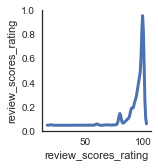

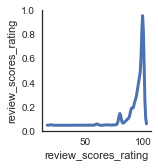

In [21]:
# Take a subset of the data to make plots clearer.
df_use = df.loc[
    ((df['host_identity_verified'] == 't') | (df['host_identity_verified'] == 'f')),
    ['host_identity_verified', 'review_scores_rating']
]


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_use.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [ ]:
# Need to find a way to analyze booking rate. 
# Make a heatmap to find correlations to booking rate. 

# Might use number of reviews, price, host_response_time, 

### Analysis that highlights your experimental hypothesis.

    Hypothesis - A user is more likely to book a unit with a verified host.

### A rollout plan showing how you would implement and rollout the experiment.

 Experiment Proposal:
   
	Two Versions: Verified hosts vs non-verified hosts.
    
	Two Samples: Use a binomial distribution to show the hosts as verified to half of users and non-verified to the other half.
    
    Hypothesis: A user is more likely to book a unit with a verified host. 
    
    Outcomes of Interest: Number of bookings for verified hosts vs non-verified hosts. 
    
    Other Measured Variables: The locations of the units to areas of interest, the number of nearby properties with verified hosts. 
    
    Proposal: Select a group of properties in Austin, Texas that have a similar booking rate. Randomly select half the users to see that the host of the property is verified for any property they view. For the other half, show that the host is not verified. Collect data on the booking rates over the course of one year. Compare the booking rate of verified hosts to the booking rate of non-verified hosts. 

### An evaluation plan showing what constitutes success in this experiment